LOADING LIABRARY

In [194]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns

LOADING DATA

In [195]:
boston = load_boston() 

MAKING DATAFRAME FROM BOSTON DATA

In [196]:
data = pd.DataFrame( boston.data, columns = boston.feature_names) 

In [197]:
data['MEDV']=boston.target

In [198]:
data.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:xlabel='RAD'>

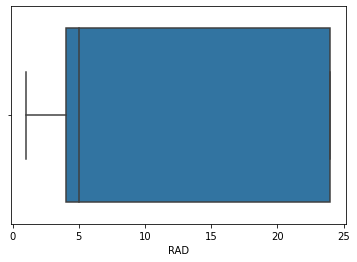

In [199]:
sns.boxplot(x=data['RAD']) 

FINDING OUTLIERS

In [200]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

iqr = q3-q1

lower = q1-(1.5*iqr)
upper = q3+(1.5*iqr) 

REMOVE OUTLIERS FROM DATA

In [201]:
data = data[~((data<lower)|(data>upper)).any(axis=1)] 

In [202]:
data.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  

CHECKING NULL VALUES

In [203]:
data.isnull().sum() 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

SPLITING DATA INTO input and output

In [204]:
x = data.drop(['MEDV'],axis=1)
y = data[['MEDV']]
x.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [205]:
y.head() 

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


SCALING / STANDARIZING INPUT

In [206]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x) 

splitind data into train and test

In [207]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x ,y ,test_size=0.3)

DECISION TREE 

In [208]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [209]:
x_train.shape

(187, 13)

In [210]:
y_train.shape


(187, 1)

In [211]:
dtr.fit(x_train,y_train) 

DecisionTreeRegressor()

In [212]:
y_pred = dtr.predict(x_test) 

In [213]:
y_pred

array([23.1, 23.9, 19.2, 24.6, 18.8, 23.1, 21.1, 19. , 19.6, 18. , 20.5,
       28.1, 14.6, 15.2,  8.5, 18.5, 28. , 24.5, 23.8, 21.4, 23.1, 24.4,
       24.4, 24.6, 23. , 14.5, 17.5, 20. , 23.1, 20.6, 16.7, 22.6, 28.1,
       23.7, 23.7, 17.8, 23.1, 23. , 22.9, 14.6, 22.9, 15.7, 23.8, 20.5,
       28. , 18.2, 25.2, 17.2, 24.6, 22.9, 23.8, 22.1, 22.6, 15.7, 17.6,
       21.1, 23. , 22.1, 15. , 22.1, 24.3, 13.3, 19.6, 23.2, 22.6, 13.3,
       24.3, 20.5, 20.1, 33.2, 22.1, 24.6, 26.2, 22.6, 24.4, 24.3, 20.1,
       22. , 16.2, 24.4, 15.2])

In [214]:
y_test

,MEDV
53,23.4
504,22.0
108,19.8
175,29.4
113,18.7
...,...
50,19.7
342,16.5
309,20.3
326,23.0


CREATED DATA FRAME FOR VISULIZATION

In [215]:
res = {
    "test":np.array(y_test['MEDV']),
    "pred":y_pred
}
res = pd.DataFrame(res)
res.head(10) 

,test,pred
0,23.4,23.1
1,22.0,23.9
2,19.8,19.2
3,29.4,24.6
4,18.7,18.8
5,21.8,23.1
6,16.1,21.1
7,19.5,19.0
8,23.0,19.6
9,16.2,18.0


CHECKING ERROR 

In [216]:
from sklearn.metrics import mean_squared_error

In [217]:
mean_squared_error(y_pred,y_test) 

10.607901234567901

RANDOM FOREST

In [218]:
from sklearn.ensemble import RandomForestRegressor 

In [219]:
rfr = RandomForestRegressor(n_estimators=1000) 

In [220]:
rfr.fit(x_train,y_train) 

<ipython-input-220-3f392adc2e88>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train,y_train)


RandomForestRegressor(n_estimators=1000)

In [221]:
y_pred = rfr.predict(x_test) 

In [222]:
res = {
    "test":np.array(y_test['MEDV']),
    "pred":y_pred
}
res = pd.DataFrame(res)
res.head(10) 

,test,pred
0,23.4,22.1030
1,22.0,25.1754
2,19.8,19.2467
3,29.4,24.5622
4,18.7,17.7641
5,21.8,21.5978
6,16.1,21.1494
7,19.5,19.7280
8,23.0,19.4565
9,16.2,16.2702


In [223]:
mean_squared_error(y_pred,y_test)


7.820911919876533